# EMOTIONS DATABASE 

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
emotions = arff.loadarff('multilabel-classification-emotions/emotions.arff')
emotions = pd.DataFrame(emotions[0])
emotions['amazed-suprised'].head()

0    b'0'
1    b'1'
2    b'0'
3    b'0'
4    b'0'
Name: amazed-suprised, dtype: object

In [3]:
#converte os valores das emoções de binário para float
emotions = emotions.astype(float)
emotions['amazed-suprised'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: amazed-suprised, dtype: float64

## Dados faltantes e duplicados 

In [4]:
emotions.isnull().sum()

Mean_Acc1298_Mean_Mem40_Centroid    0
Mean_Acc1298_Mean_Mem40_Rolloff     0
Mean_Acc1298_Mean_Mem40_Flux        0
Mean_Acc1298_Mean_Mem40_MFCC_0      0
Mean_Acc1298_Mean_Mem40_MFCC_1      0
                                   ..
happy-pleased                       0
relaxing-calm                       0
quiet-still                         0
sad-lonely                          0
angry-aggresive                     0
Length: 78, dtype: int64

In [5]:
emotions.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
588    False
589    False
590    False
591    False
592    False
Length: 593, dtype: bool

Não existe problemas de duplicatas ou dados faltantes nesse dataset

##  Outliers

## Correlação

In [6]:
#correlação entre as colunas das emoções
corr = emotions.corr()
corr.style.background_gradient(cmap = 'coolwarm')

## Avaliação da distribuição

In [7]:
#faz a separação entre o conjunto de treino e a parte que será correspondente aos labels
X = emotions.iloc[:,0:72]
initial_y = emotions.iloc[:,72:79]
initial_y.head()

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
#faz a transformação de 6 colunas para uma através do sistema binário
y = pd.DataFrame()

for i in range(len(initial_y.columns)):
    if not i:
        y = pd.DataFrame(initial_y.iloc[:,i:i+1].values) * 2**i
    else:
        y += initial_y.iloc[:,i:i+1].values * 2**i

y.head()

,0
0,6.0
1,33.0
2,34.0
3,4.0
4,8.0


In [9]:
#Número de classes
classes = y[0].value_counts()
print(len(classes))

27


In [10]:
classes.head()

33.0    81
6.0     74
32.0    72
28.0    67
4.0     42
Name: 0, dtype: int64

Text(0, 0.5, 'Frequency')

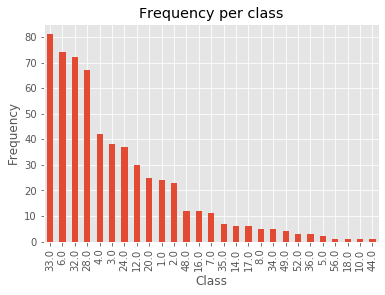

In [11]:
classes.plot(kind = 'bar')
plt.title("Frequency per class")
plt.xticks(range(len(classes)),classes.index)
plt.xlabel("Class")
plt.ylabel("Frequency")

como podemos ver no gráfico de barras plotado, há uma maior predominância da classe 33 com quase 80 instâncias ao passo que a classe 44 só tem uma, logo , temos uma base de dados extremamente desbalanceada e que provavelmente não conseguiria prever de forma adequadas os atributos que estão em menor proporção

In [12]:
df = X.join(y).rename(columns = {0:'emotions'})
df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,emotions
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399,6.0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.041565,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,0.710924,33.0
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.085821,0.161574,61.0,0.000000,183.0,3.0,0.188693,0.045941,0.457372,34.0
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,0.122330,0.043012,66.0,0.206562,132.0,2.0,0.102839,0.241934,0.351009,4.0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,0.189988,0.029308,100.0,0.144039,200.0,2.0,0.195196,0.310801,0.683817,8.0


### Oversampling das classes minoritárias para o tamanho da classe maior e eliminação das classes com só uma representação

56,18,10,44

In [13]:
df.shape

(593, 73)

In [14]:
index = []

In [15]:
index.append(df.loc[df['emotions'] == 56].index)

In [16]:
index.append(df.loc[df['emotions'] == 18].index)

In [17]:
index.append(df.loc[df['emotions'] == 10].index)

In [18]:
index.append(df.loc[df['emotions'] == 44].index)

In [19]:
index
len(index)

4

In [20]:
for i in range(len(index)):
    print(i)
    df = df.drop(index = index[i])

0
1
2
3


In [21]:
df.shape

(589, 73)

colunas com só um atributo dropadas.

## Separação em treino e teste

In [22]:
counts = df['emotions'].value_counts()
counts

33.0    81
6.0     74
32.0    72
28.0    67
4.0     42
3.0     38
24.0    37
12.0    30
20.0    25
1.0     24
2.0     23
16.0    12
48.0    12
7.0     11
35.0     7
17.0     6
14.0     6
8.0      5
34.0     5
49.0     4
36.0     3
52.0     3
5.0      2
Name: emotions, dtype: int64

O mínimo agora tem 2.

In [23]:
counts.index

Float64Index([33.0,  6.0, 32.0, 28.0,  4.0,  3.0, 24.0, 12.0, 20.0,  1.0,  2.0,
              16.0, 48.0,  7.0, 35.0, 17.0, 14.0,  8.0, 34.0, 49.0, 36.0, 52.0,
               5.0],
             dtype='float64')

In [24]:
counts.values

array([81, 74, 72, 67, 42, 38, 37, 30, 25, 24, 23, 12, 12, 11,  7,  6,  6,
        5,  5,  4,  3,  3,  2])

In [25]:
data = pd.DataFrame()
train = pd.DataFrame()
test = pd.DataFrame()
for classe, valor in zip(counts.index,counts.values):
    data = df.loc[df['emotions'] == classe].sample(valor)
    treino = int(valor * 0.8)
    print(treino)
    if classe == 33:
        train = data.iloc[0:treino,:]
        test = data.iloc[treino:valor,:]
        continue
    train = train.append(data.iloc[0:treino,:])
    test = test.append(data.iloc[treino:valor,:])

64
59
57
53
33
30
29
24
20
19
18
9
9
8
5
4
4
4
4
3
2
2
1


In [26]:
train

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,emotions
20,0.090841,0.221729,0.083844,-62.038530,3.392900,0.122367,1.322220,0.259427,0.546771,0.591368,...,0.075316,0.262349,90.0,0.416770,180.0,2.0,0.570178,0.195529,1.386673,33.0
15,0.081393,0.490578,0.097462,-75.447622,2.014756,2.359655,1.697092,1.088954,1.203154,0.661206,...,0.053409,1.194830,66.0,1.313201,132.0,2.0,1.285485,1.313201,2.618282,33.0
267,0.107099,0.280640,0.078306,-61.925089,2.976223,0.331022,2.078355,0.347609,0.818205,0.626897,...,0.080115,0.124569,68.0,0.155643,136.0,2.0,0.246001,0.367362,0.641715,33.0
373,0.097000,0.231720,0.079245,-59.117919,3.346005,-0.482212,1.130072,-0.131465,0.777962,0.495839,...,0.106155,0.153383,78.0,0.003881,156.0,2.0,0.346194,0.271396,0.632123,33.0
587,0.062165,0.186532,0.080289,-66.001223,3.395815,1.358438,1.960863,0.382045,0.844411,0.950132,...,0.086919,0.017828,73.0,0.231782,146.0,2.0,0.118007,0.026197,0.384191,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.064984,0.322048,0.096059,-69.020280,4.550192,1.655251,1.126918,0.476409,0.397545,0.586000,...,0.098819,0.093769,59.0,0.000000,177.0,3.0,0.235092,0.052390,0.311204,36.0
25,0.049007,0.281936,0.083871,-70.347280,2.039672,2.581988,2.300394,0.915189,0.677891,0.650469,...,0.055962,0.226138,90.0,0.401992,180.0,2.0,0.714863,0.055066,1.402736,36.0
75,0.075896,0.167156,0.090672,-67.317107,5.100871,1.572710,2.227846,0.577227,0.235956,0.575726,...,0.081371,0.067724,71.0,0.000000,213.0,3.0,0.278798,0.068072,0.503480,52.0
51,0.043511,0.107128,0.090726,-71.939959,6.327130,1.276947,1.515848,0.117224,0.423398,0.283141,...,0.064043,0.044831,102.0,0.000000,204.0,2.0,0.138391,0.151616,0.525540,52.0


In [27]:
test

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,emotions
566,0.123639,0.365106,0.088754,-63.396286,3.211787,1.342043,0.991693,0.692573,0.815442,0.652204,...,0.050276,0.169019,71.0,0.221615,142.0,2.0,0.437938,0.163749,0.890201,33.0
211,0.041604,0.329611,0.095629,-69.359474,3.766187,0.362140,1.608835,0.797143,1.123242,0.717531,...,0.039062,0.774906,68.0,0.827992,136.0,2.0,0.813926,0.827992,1.736174,33.0
516,0.061806,0.182233,0.081687,-62.924453,2.284638,1.110443,2.073200,0.998594,0.777752,0.805728,...,0.096363,0.046568,85.0,0.000000,170.0,2.0,0.205307,0.027437,0.252808,33.0
523,0.024219,0.325464,0.106252,-71.933275,4.022402,1.968695,1.742567,1.200700,0.825936,0.544186,...,0.044768,0.768066,70.0,0.980748,140.0,2.0,0.869946,0.980748,1.996273,33.0
97,0.115189,0.414242,0.094059,-75.378674,1.606148,2.342139,1.812999,1.051490,1.438829,0.667829,...,0.052862,1.513175,66.0,1.750715,132.0,2.0,1.578030,1.750715,3.328744,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.085821,0.161574,61.0,0.000000,183.0,3.0,0.188693,0.045941,0.457372,34.0
544,0.073549,0.184322,0.093470,-69.036644,3.996756,0.818633,1.311068,0.400103,0.442149,0.694631,...,0.096229,0.341820,87.0,0.973984,174.0,2.0,1.015035,0.203494,2.377384,49.0
526,0.065494,0.197842,0.095774,-72.075566,4.191048,1.834673,1.769465,1.281953,0.617738,0.849727,...,0.068904,0.016247,87.0,0.000000,174.0,2.0,0.037710,0.075447,0.121915,36.0
565,0.123246,0.341786,0.089209,-67.105684,3.335515,1.771894,0.995808,0.502601,0.488615,0.661762,...,0.101149,0.198464,91.0,0.006713,182.0,2.0,0.409785,0.747923,1.241796,52.0


conseguimos dividir em treino e teste

In [28]:
train['emotions']

20     33.0
15     33.0
267    33.0
373    33.0
587    33.0
       ... 
119    36.0
25     36.0
75     52.0
51     52.0
74      5.0
Name: emotions, Length: 461, dtype: float64

In [29]:
test['emotions']

566    33.0
211    33.0
516    33.0
523    33.0
97     33.0
       ... 
2      34.0
544    49.0
526    36.0
565    52.0
283     5.0
Name: emotions, Length: 128, dtype: float64

a divisão ficou aproximadamente de 0.8 para 0.2

## Agora faz o oversampling só no treino

In [30]:
columns = train.columns.tolist()
columns = [c for c in columns if c not in ['emotions']]
columns

['Mean_Acc1298_Mean_Mem40_Centroid',
 'Mean_Acc1298_Mean_Mem40_Rolloff',
 'Mean_Acc1298_Mean_Mem40_Flux',
 'Mean_Acc1298_Mean_Mem40_MFCC_0',
 'Mean_Acc1298_Mean_Mem40_MFCC_1',
 'Mean_Acc1298_Mean_Mem40_MFCC_2',
 'Mean_Acc1298_Mean_Mem40_MFCC_3',
 'Mean_Acc1298_Mean_Mem40_MFCC_4',
 'Mean_Acc1298_Mean_Mem40_MFCC_5',
 'Mean_Acc1298_Mean_Mem40_MFCC_6',
 'Mean_Acc1298_Mean_Mem40_MFCC_7',
 'Mean_Acc1298_Mean_Mem40_MFCC_8',
 'Mean_Acc1298_Mean_Mem40_MFCC_9',
 'Mean_Acc1298_Mean_Mem40_MFCC_10',
 'Mean_Acc1298_Mean_Mem40_MFCC_11',
 'Mean_Acc1298_Mean_Mem40_MFCC_12',
 'Mean_Acc1298_Std_Mem40_Centroid',
 'Mean_Acc1298_Std_Mem40_Rolloff',
 'Mean_Acc1298_Std_Mem40_Flux',
 'Mean_Acc1298_Std_Mem40_MFCC_0',
 'Mean_Acc1298_Std_Mem40_MFCC_1',
 'Mean_Acc1298_Std_Mem40_MFCC_2',
 'Mean_Acc1298_Std_Mem40_MFCC_3',
 'Mean_Acc1298_Std_Mem40_MFCC_4',
 'Mean_Acc1298_Std_Mem40_MFCC_5',
 'Mean_Acc1298_Std_Mem40_MFCC_6',
 'Mean_Acc1298_Std_Mem40_MFCC_7',
 'Mean_Acc1298_Std_Mem40_MFCC_8',
 'Mean_Acc1298_Std_Mem40_MF

In [31]:
target = "emotions"
resampled = pd.DataFrame()

In [32]:
samples = len(train.loc[train['emotions'] == 33.0])
samples

64

In [33]:
replacement_data = np.asarray(train.loc[train['emotions'] == 33.0])
replacement_data

array([[ 0.090841,  0.221729,  0.083844, ...,  0.195529,  1.386673,
        33.      ],
       [ 0.081393,  0.490578,  0.097462, ...,  1.313201,  2.618282,
        33.      ],
       [ 0.107099,  0.28064 ,  0.078306, ...,  0.367362,  0.641715,
        33.      ],
       ...,
       [ 0.060728,  0.151699,  0.095764, ...,  0.      ,  0.766466,
        33.      ],
       [ 0.08743 ,  0.198217,  0.08378 , ...,  0.052557,  0.086912,
        33.      ],
       [ 0.096718,  0.411587,  0.097933, ...,  1.088424,  2.354439,
        33.      ]])

In [34]:
classes = train['emotions'].value_counts()
classes

33.0    64
6.0     59
32.0    57
28.0    53
4.0     33
3.0     30
24.0    29
12.0    24
20.0    20
1.0     19
2.0     18
16.0     9
48.0     9
7.0      8
35.0     5
17.0     4
14.0     4
8.0      4
34.0     4
49.0     3
52.0     2
36.0     2
5.0      1
Name: emotions, dtype: int64

In [35]:
classes.max()

64

In [36]:
for i, number_emot in zip(range(len(classes)),classes.index):
    if not i:
        resampled = pd.DataFrame(train.loc[train['emotions'] == number_emot].values)
        continue
    replacement_data = np.asarray(train.loc[train['emotions'] == number_emot])
    resampled = resampled.append(pd.DataFrame(replacement_data).sample(classes.max(),replace = True,random_state = 0))


agora vamos visualizar o histograma e vemos que está balanceado

In [37]:
resampled

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.090841,0.221729,0.083844,-62.038530,3.392900,0.122367,1.322220,0.259427,0.546771,0.591368,...,0.075316,0.262349,90.0,0.416770,180.0,2.0,0.570178,0.195529,1.386673,33.0
1,0.081393,0.490578,0.097462,-75.447622,2.014756,2.359655,1.697092,1.088954,1.203154,0.661206,...,0.053409,1.194830,66.0,1.313201,132.0,2.0,1.285485,1.313201,2.618282,33.0
2,0.107099,0.280640,0.078306,-61.925089,2.976223,0.331022,2.078355,0.347609,0.818205,0.626897,...,0.080115,0.124569,68.0,0.155643,136.0,2.0,0.246001,0.367362,0.641715,33.0
3,0.097000,0.231720,0.079245,-59.117919,3.346005,-0.482212,1.130072,-0.131465,0.777962,0.495839,...,0.106155,0.153383,78.0,0.003881,156.0,2.0,0.346194,0.271396,0.632123,33.0
4,0.062165,0.186532,0.080289,-66.001223,3.395815,1.358438,1.960863,0.382045,0.844411,0.950132,...,0.086919,0.017828,73.0,0.231782,146.0,2.0,0.118007,0.026197,0.384191,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.047676,0.117463,0.074581,-97.510495,8.310384,-0.197825,2.046647,1.489265,1.284378,0.408218,...,0.083473,0.061409,84.0,0.000000,168.0,2.0,0.225884,0.188141,0.681908,5.0
0,0.047676,0.117463,0.074581,-97.510495,8.310384,-0.197825,2.046647,1.489265,1.284378,0.408218,...,0.083473,0.061409,84.0,0.000000,168.0,2.0,0.225884,0.188141,0.681908,5.0
0,0.047676,0.117463,0.074581,-97.510495,8.310384,-0.197825,2.046647,1.489265,1.284378,0.408218,...,0.083473,0.061409,84.0,0.000000,168.0,2.0,0.225884,0.188141,0.681908,5.0
0,0.047676,0.117463,0.074581,-97.510495,8.310384,-0.197825,2.046647,1.489265,1.284378,0.408218,...,0.083473,0.061409,84.0,0.000000,168.0,2.0,0.225884,0.188141,0.681908,5.0


Text(0, 0.5, 'Frequency')

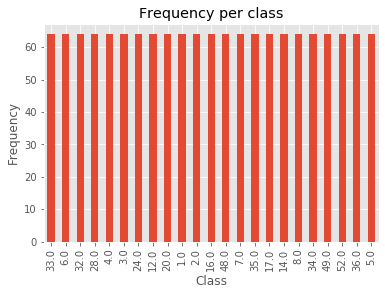

In [38]:
resampled[72].value_counts().plot(kind = 'bar')
plt.title("Frequency per class")
plt.xticks(range(len(resampled[72].value_counts())),classes.index)
plt.xlabel("Class")
plt.ylabel("Frequency")

## Scala

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [51]:
X_train_almost = scaler.fit_transform(resampled.iloc[:,0:72].values)
y_train = resampled.iloc[:,72].values

In [52]:
X_test_almost = test.drop(columns = {'emotions'})

In [53]:
y_test = test['emotions']

In [54]:
print(y_train)
print(X_train)
print(X_test)
print(y_test)

[33. 33. 33. ...  5.  5.  5.]
[[ 0.803289    0.31184133 -0.12933589 ...  0.45469689 -0.35600951
   0.68196629]
 [ 0.47245272  2.88808809  1.6060288  ...  2.61834725  2.91046381
   2.6200733 ]
 [ 1.37258793  0.87635625 -0.83505256 ... -0.52586905  0.14618425
  -0.49032811]
 ...
 [-0.70820001 -0.68728809 -1.30973559 ... -0.58671866 -0.37760145
  -0.42707886]
 [-0.70820001 -0.68728809 -1.30973559 ... -0.58671866 -0.37760145
  -0.42707886]
 [-0.70820001 -0.68728809 -1.30973559 ... -0.58671866 -0.37760145
  -0.42707886]]
[[ 1.71197841  1.56696274  0.23130302 ...  0.12329066 -0.55605322
  -0.09597472]
 [-0.88354611  1.24424911  0.86349046 ...  1.28276154  1.43891666
   1.21118125]
 [-0.24437032 -0.09568294 -0.4185397  ... -0.59409625 -0.96544908
  -1.08084311]
 ...
 [-0.12768482  0.04623105  0.87682387 ... -1.11093147 -0.82125712
  -1.28309255]
 [ 1.69954419  1.35494184  0.27314233 ...  0.03647251  1.19843954
   0.44729262]
 [-0.71392818 -0.75663899 -1.15049781 ... -0.00835666 -0.57934138
  

In [55]:
X_test_almost = scaler.fit_transform(X_test_almost)

In [56]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components = 30)
X_train= pca.fit_transform(X_train_almost)
explained_variance = pca.explained_variance_ratio_

In [66]:
explained_variance.sum()

0.9278490436868242

In [67]:
X_test= pca.fit_transform(X_test_almost)
explained_variance = pca.explained_variance_ratio_

In [68]:
explained_variance.sum()

0.9393136037349845

## Treino 

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import keras

In [70]:
classifier = RandomForestClassifier(n_estimators = 100, n_jobs = -1,verbose = 0)
#classifier = XGBClassifier(n_estimators = 120,n_jobs = -1,)
#classifier = XGBClassifier()
#classifier = KNeighborsClassifier(n_neighbors = 7, n_jobs = -1)

In [71]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 1 0 0 0 0 1 0 0 2 0 2 0 0 0 0 0 0]
 [0 0 0 1 0 2 0 0 0 0 0 0 0 0 1 3 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 4 0 0 3 0 0 0 1 0 1 1 2 1 0 0 0 0 0]
 [0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 1 2 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 1 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 3 0 0 0 0 0 0 0 1 9 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 5 3 2 0 1 0 0 2]
 [1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 4 6 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 

In [74]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.265625


In [75]:
from sklearn.metrics import f1_score

In [76]:
f1 = f1_score(y_test,y_pred,average='weighted')
f1

0.24979707206269705